In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
dir = '/home/milad/Desktop/python/AI/DL/Mini_project/db/glove.6B'
embeddings_index = {}
with open(f'{dir}/glove.6B.100d.txt',encoding='utf-8') as f:
  lines = f.readlines()
  for line in lines:
    values = line.split()
    word = values[0]
    embed = values[1:]
    weights = np.asarray(embed,dtype = 'float32')
    embeddings_index[word] = weights

len(embeddings_index.keys())

400000

In [5]:
embeddings_index['father']

array([ 0.64706 , -0.068067,  0.15468 , -0.17408 , -0.29134 ,  0.76999 ,
       -0.3192  , -0.25663 , -0.25082 , -0.036737, -0.25509 ,  0.29636 ,
        0.5776  ,  0.49641 ,  0.19167 , -0.83888 ,  0.58482 , -0.38717 ,
       -0.71591 ,  0.9519  , -0.37966 , -0.1131  ,  0.47154 ,  0.20921 ,
        0.38197 ,  0.067582, -0.92879 , -1.1237  ,  0.84831 ,  0.68744 ,
       -0.15472 ,  0.92714 ,  0.53371 , -0.037392, -0.856   ,  0.19056 ,
       -0.014594,  0.15186 ,  0.53514 , -0.20306 , -0.35164 ,  0.33152 ,
        1.1306  , -0.72787 , -0.19724 ,  0.031659, -0.24041 , -0.057617,
        0.60473 , -0.49233 , -0.24405 , -0.3184  ,  0.96156 ,  1.0895  ,
        0.21534 , -2.0542  , -1.0615  ,  0.052439,  0.57958 ,  0.2748  ,
        0.91587 ,  0.85195 ,  0.36113 , -0.31901 ,  0.7784  , -0.36865 ,
        0.64387 ,  0.33104 , -0.27181 ,  0.58524 , -0.15143 ,  0.11121 ,
        0.2126  , -0.60345 ,  0.16148 ,  0.32952 , -0.1354  , -0.30629 ,
       -0.89143 ,  0.091912,  0.49753 ,  0.55932 , 

In [10]:
words = ['father','china','chinese','iran','india','man','woman','son']

In [11]:
vectors = np.array([embeddings_index[w] for w in words])

In [12]:
pca = PCA(n_components=2)
pca.fit(vectors)
x_emb=pca.transform(vectors)
vectors.shape,x_emb.shape

((8, 100), (8, 2))

In [13]:
x_emb[0],x_emb[-1]

(array([-3.3260221 , -0.47949806], dtype=float32),
 array([-3.4997816, -0.6605845], dtype=float32))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


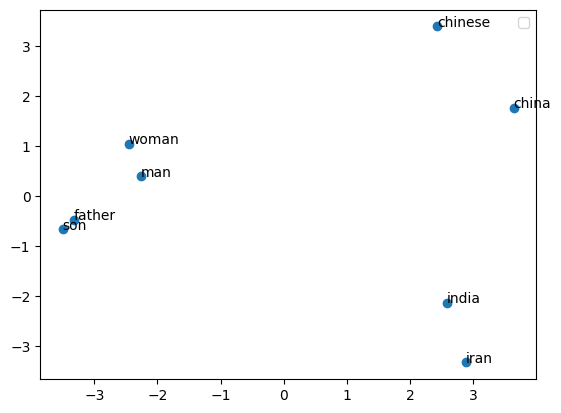

In [14]:
plt.scatter(x_emb[:,0],x_emb[:,1])
for label, x, y in zip(words, x_emb[:, 0], x_emb[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.legend()

In [6]:
father = embeddings_index['father']
mother = embeddings_index['mother']
tehran = embeddings_index['tehran']
paris = embeddings_index['paris']
france = embeddings_index['france']
iran = embeddings_index['iran']

In [8]:
father.reshape(1,-1).shape

(1, 100)

In [9]:
def similarity(u,v):
  return np.squeeze(cosine_similarity(u.reshape(1,-1),v.reshape(1,-1)))

In [10]:
similarity(father,mother)

array(0.8656661, dtype=float32)

In [11]:
similarity(tehran,paris)

array(0.45368147, dtype=float32)

In [12]:
similarity(france,iran)

array(0.46655208, dtype=float32)

In [13]:
similarity(france - paris,iran - tehran)

array(0.6854124, dtype=float32)

In [14]:
similarity(france - paris,tehran - iran)

array(-0.6854124, dtype=float32)

In [16]:
def complete_analogy(word_a,word_b,word_c,embeddings_index):
  word_a,word_b,word_c = word_a.lower(),word_b.lower(),word_c.lower()
  embed_a,embed_b,embed_c = embeddings_index[word_a],embeddings_index[word_b],embeddings_index[word_c]
  words = embeddings_index.keys()
  max_cosine_sim = float('-inf')
  best_word = None

  for w in words:
    if w in [word_a,word_b,word_c]:
      continue

    cosine_sim = similarity(embed_b - embed_a, embeddings_index[w] - embed_c)

    if cosine_sim > max_cosine_sim:
      max_cosine_sim = cosine_sim
      best_word = w

  return best_word

In [17]:
complete_analogy('china','chinese','iran',embeddings_index)

'iranian'

In [18]:
def complete_analogy2(word_a,word_b,word_c,embeddings_index,limit=5):
  word_a,word_b,word_c = word_a.lower(),word_b.lower(),word_c.lower()
  embed_a,embed_b,embed_c = embeddings_index[word_a],embeddings_index[word_b],embeddings_index[word_c]
  words = embeddings_index.keys()
  max_cosine_sim = float('-inf')
  best_word = {}

  for w in words:
    if w in [word_a,word_b,word_c]:
      continue

    cosine_sim = similarity(embed_b - embed_a, embeddings_index[w] - embed_c)

    if cosine_sim > max_cosine_sim:
      max_cosine_sim = cosine_sim
      best_word[w] = cosine_sim

  return sorted(best_word.items(),key = lambda x:x[1],reverse=True)[:limit]

In [15]:
complete_analogy2('china','chinese','iran', embeddings_index)

[('iranian', array(0.796303, dtype=float32)),
 ('turkish', array(0.6328089, dtype=float32)),
 ('greek', array(0.60495967, dtype=float32)),
 ('iraqi', array(0.57764673, dtype=float32)),
 ('russian', array(0.5115686, dtype=float32))]